# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

In [3]:
#shapes
print('shape of X_train',X_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)

shape of X_train (60000, 28, 28)
shape of X_test (10000, 28, 28)
shape of y_train (60000,)
shape of y_test (10000,)


Let's visualize some numbers using matplotlib

Label: 0


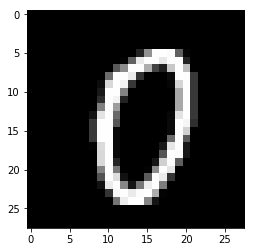

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
X_train_d1 = X_train[y_train < 5]
X_test_d1 = X_test[y_test < 5]
y_train_d1 = y_train[y_train < 5]
y_test_d1 = y_test[y_test < 5]


In [0]:
X_train_d2 = X_train[y_train >= 5]
X_test_d2 = X_test[y_test >= 5]
y_train_d2 = y_train[y_train >= 5]
y_test_d2 = y_test[y_test >= 5]

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [7]:
#Dataset 1 shapes
print('shape of X_train_d1',X_train_d1.shape)
print('shape of X_test_d1',X_test_d1.shape)
print('shape of y_train_d1',y_train_d1.shape)
print('shape of y_test_d1',y_test_d1.shape)

shape of X_train_d1 (30596, 28, 28)
shape of X_test_d1 (5139, 28, 28)
shape of y_train_d1 (30596,)
shape of y_test_d1 (5139,)


In [8]:
#Dataset 2 shapes
print('shape of X_train_d2',X_train_d2.shape)
print('shape of X_test_d2',X_test_d2.shape)
print('shape of y_train_d2',y_train_d2.shape)
print('shape of y_test_d2',y_test_d2.shape)

shape of X_train_d2 (29404, 28, 28)
shape of X_test_d2 (4861, 28, 28)
shape of y_train_d2 (29404,)
shape of y_test_d2 (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [9]:
X_train_d1 = X_train_d1.reshape(X_train_d1.shape[0], 28, 28, 1)
X_train_d1.shape

(30596, 28, 28, 1)

In [10]:
X_test_d1 = X_test_d1.reshape(X_test_d1.shape[0], 28, 28, 1)
X_test_d1.shape

(5139, 28, 28, 1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [11]:
X_train_d1 = X_train_d1.astype('float32') / 255
X_train_d1.dtype

dtype('float32')

In [12]:
X_test_d1 = X_test_d1.astype('float32') / 255
X_test_d1.dtype

dtype('float32')

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [13]:
print('shape of X_train_d1',X_train_d1.shape)
print('shape of X_test_d1',X_test_d1.shape)

shape of X_train_d1 (30596, 28, 28, 1)
shape of X_test_d1 (5139, 28, 28, 1)


In [14]:
print('Number of Images on X_train',X_train_d1.shape[0])
print('Number of Images on X_test',X_test_d1.shape[0])

Number of Images on X_train 30596
Number of Images on X_test 5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
import tensorflow as tf

y_train_d1 = tf.keras.utils.to_categorical(y_train_d1,num_classes=5)

In [0]:
y_test_d1 = tf.keras.utils.to_categorical(y_test_d1,num_classes=5)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [0]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

In [19]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(64, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

In [0]:
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Add dropout layer
model.add(tf.keras.layers.Dropout(0.20))

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add dropout layer
model.add(tf.keras.layers.Dropout(0.5))

#Output layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
#Compile
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
#Train the model
model.fit(X_train_d1,y_train_d1,          
          validation_data=(X_test_d1,y_test_d1),
          epochs=10,
          batch_size=128)

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 7s 222us/sample - loss: 0.5999 - acc: 0.8261 - val_loss: 0.1207 - val_acc: 0.9661
Epoch 2/10
30596/30596 [==============================] - 4s 117us/sample - loss: 0.1775 - acc: 0.9466 - val_loss: 0.0830 - val_acc: 0.9763
Epoch 3/10
30596/30596 [==============================] - 4s 117us/sample - loss: 0.1425 - acc: 0.9578 - val_loss: 0.0704 - val_acc: 0.9798
Epoch 4/10
30596/30596 [==============================] - 4s 117us/sample - loss: 0.1264 - acc: 0.9622 - val_loss: 0.0667 - val_acc: 0.9788
Epoch 5/10
30596/30596 [==============================] - 4s 117us/sample - loss: 0.1164 - acc: 0.9639 - val_loss: 0.0533 - val_acc: 0.9842
Epoch 6/10
30596/30596 [==============================] - 4s 117us/sample - loss: 0.1040 - acc: 0.9672 - val_loss: 0.0709 - val_acc: 0.9784
Epoch 7/10
30596/30596 [==============================] - 4s 117us/sample - loss: 0.0989 - acc: 0.9710 - val_lo

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1179776   
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0

In [28]:
model.evaluate(X_test_d1,y_test_d1)

5139/5139 [==============================] - 1s 127us/sample - loss: 0.0366 - acc: 0.9891


[0.036637777650352234, 0.98910296]

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [29]:
for layer in model.layers:
    print(layer.name)

conv2d
conv2d_1
max_pooling2d
dropout
flatten
dense
dropout_1
dense_1


In [30]:
for layer in model.layers:
  if 'dense' in layer.name:
    print(layer.name)

dense
dense_1


In [0]:
#Set pre-trained model Dense layers to not trainable
for layer in model.layers:
    if 'dense' in layer.name:
      layer.trainable = False

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
y_train_d2 = y_train_d2 - 5
y_test_d2 = y_test_d2 - 5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [33]:
X_train_d2 = X_train_d2.reshape(X_train_d2.shape[0], 28, 28, 1)
X_train_d2.shape

(29404, 28, 28, 1)

In [34]:
X_test_d2 = X_test_d2.reshape(X_test_d2.shape[0], 28, 28, 1)
X_test_d2.shape

(4861, 28, 28, 1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [35]:
X_train_d2 = X_train_d2.astype('float32') / 255
X_train_d2.dtype

dtype('float32')

In [36]:
X_test_d2 = X_test_d2.astype('float32') / 255
X_test_d2.dtype

dtype('float32')

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [37]:
print('shape of X_train_d2',X_train_d2.shape)
print('shape of X_test_d2',X_test_d2.shape)

shape of X_train_d2 (29404, 28, 28, 1)
shape of X_test_d2 (4861, 28, 28, 1)


In [38]:
print('Number of Images on X_train',X_train_d2.shape[0])
print('Number of Images on X_test',X_test_d2.shape[0])

Number of Images on X_train 29404
Number of Images on X_test 4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
y_train_d2 = tf.keras.utils.to_categorical(y_train_d2,num_classes=5)

In [0]:
y_test_d2 = tf.keras.utils.to_categorical(y_test_d2,num_classes=5)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
#Train the model
model.fit(X_train_d2,y_train_d2,          
          validation_data=(X_test_d2,y_test_d2),
          epochs=10,
          batch_size=128)

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 4s 129us/sample - loss: 1.3606 - acc: 0.4893 - val_loss: 0.8637 - val_acc: 0.7745
Epoch 2/10
29404/29404 [==============================] - 3s 118us/sample - loss: 0.9204 - acc: 0.6603 - val_loss: 0.5941 - val_acc: 0.8544
Epoch 3/10
29404/29404 [==============================] - 3s 115us/sample - loss: 0.7831 - acc: 0.7143 - val_loss: 0.4998 - val_acc: 0.8757
Epoch 4/10
29404/29404 [==============================] - 3s 117us/sample - loss: 0.7050 - acc: 0.7486 - val_loss: 0.4256 - val_acc: 0.8980
Epoch 5/10
29404/29404 [==============================] - 3s 117us/sample - loss: 0.6505 - acc: 0.7668 - val_loss: 0.3846 - val_acc: 0.9033
Epoch 6/10
29404/29404 [==============================] - 3s 116us/sample - loss: 0.6229 - acc: 0.7806 - val_loss: 0.3618 - val_acc: 0.9064
Epoch 7/10
29404/29404 [==============================] - 3s 116us/sample - loss: 0.5972 - acc: 0.7874 - val_lo

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1179776   
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [44]:
model.evaluate(X_test_d2,y_test_d2)

4861/4861 [==============================] - 1s 112us/sample - loss: 0.2887 - acc: 0.9210


[0.2886515788226627, 0.92100394]

-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [45]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [46]:
tweets = pd.read_csv('/content/drive/My Drive/AIML/Residency 8/tweets.csv',encoding='latin')
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [47]:
tweets.shape

(9093, 3)

## Drop null values
- drop all the rows with null values

In [48]:
tweets = tweets.dropna()
tweets.shape

(3291, 3)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [49]:
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [50]:
tweets = tweets.apply(lambda x: x.astype(str).str.lower())
tweets.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


In [0]:
import re
pattern = r'[^a-zA-Z0-9#_\s]'

tweets = tweets.applymap(lambda x: re.sub(pattern,'',x))

In [0]:
tweets = tweets.applymap(lambda x: x.strip())


print dataframe

In [53]:
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [54]:
tweets.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [55]:
tweets_data = tweets[(tweets.is_there_an_emotion_directed_at_a_brand_or_product == 'positive emotion') | 
                     (tweets.is_there_an_emotion_directed_at_a_brand_or_product == 'negative emotion')] 

tweets_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


In [56]:
tweets_data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [57]:
# convert label to a numerical variable
tweets_data['is_there_an_emotion_directed_at_a_brand_or_product'] = tweets_data.is_there_an_emotion_directed_at_a_brand_or_product.map({'positive emotion':1, 'negative emotion':0})
tweets_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,0
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,1
2,swonderlin can not wait for #ipad 2 also they ...,ipad,1
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,0
4,sxtxstate great stuff on fri #sxsw marissa may...,google,1


In [58]:
tweets_data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

1    2672
0     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [59]:
X = tweets_data.tweet_text
y = tweets_data.is_there_an_emotion_directed_at_a_brand_or_product
print(X.shape)
print(y.shape)

(3191,)
(3191,)


In [60]:
tweets_data.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product     int64
dtype: object

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [61]:
# split X and y into training and testing sets 
#use sklearn.model_selection 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2393,)
(798,)
(2393,)
(798,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=2,max_df=.5)

In [0]:
X_train_dtm = vect.fit_transform(X_train)

In [64]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<798x5562 sparse matrix of type '<class 'numpy.int64'>'
	with 9521 stored elements in Compressed Sparse Row format>

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [66]:
# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [68]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [71]:
from sklearn import metrics
print('Logistic Regression Accuracy:',metrics.accuracy_score(y_test, y_pred_class))

Logistic Regression Accuracy: 0.8734335839598998


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [72]:
print('Naive Base Accuracy:',metrics.accuracy_score(y_test, y_pred))

Naive Base Accuracy: 0.8596491228070176
